## Energy data transformation

In [2]:
import pandas as pd
import openpyxl
import numpy as np
from matplotlib import pyplot as plt

**0. Load prerequisites**

In [3]:
datasets = !ls datasets
years = list(range(2000,2018))
countries = list(pd.read_csv('datasets/'+str(datasets[0])).Country)
print(*datasets, sep="\n")

(0)countries.csv
1971-2014Electric power consumption (kWh per capita).xls
(1990-2015)Consumption_GDP ratio.csv
1990-2015GDP per capita (current US$).xls
1990-2015Renewable electricity output (_ of total electricity output).xls
countrydatasheets_august2018 (1).xlsx
expenditures on R_D in percentage of GDP.xls
Global Climate Legislation Database.csv
household_EU_2009-2017_ilc_di04_1_Data.csv
(Not complete) R_D Total Support in Million Euros.xlsx


** 1. Percentage of the Total of Renewable energy consumption **

In [4]:
renewable_energy = pd.read_csv('datasets/'+str(datasets[2]))

In [5]:
renewable_energy.head(3)

,Entity,Code,Year,Renewable energy consumption (% of total final energy consumption) (% of total final energy consumption),"GDP per capita, PPP (constant 2011 international $) (constant 2011 international $)",Total population (Gapminder)
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0
1,Afghanistan,AFG,1820,NaN,NaN,3280000.0
2,Afghanistan,AFG,1870,NaN,NaN,4207000.0


In [6]:
renewable_energy = renewable_energy[['Entity','Year',
                                     'Renewable energy consumption (% of total final energy consumption) (% of total final energy consumption)']]
renewable_energy.columns = ['country','year','percentage_renewable_energy']
renewable_energy = renewable_energy[(renewable_energy.year.isin(years)) & 
                                    (renewable_energy.country.isin(countries))]

In [7]:
renewable_energy.head(3)

,country,year,percentage_renewable_energy
161,Albania,2000,41.445416
162,Albania,2001,39.125664
163,Albania,2002,35.896294


** 2. Total RD&D in Million Euro **

In [8]:
research_energy = pd.read_excel('datasets/'+str(datasets[-1]), header=4 ,sheet_name='OECD.Stat export')

In [9]:
research_energy.head(3)

,Time,Unnamed: 1,1974,1975,1976,1977,1978,1979,1980,1981,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,NaN,..,..,..,..,..,0,14.431,16.799,...,35.027,31.066,97.929,72.585,52.407,51.642,21.583,21.449,15.088,21.936
2,Austria,NaN,..,..,..,14.891,16.478,15.204,19.663,16.422,...,27.352,42.722,62.972,70.77,60.305,59.508,64.833,58.456,67.333,65.747


In [10]:
research_energy = pd.melt(research_energy, id_vars=research_energy.columns[0], 
            value_vars=list(research_energy.columns[1:]), var_name='Year', value_name='rrd_million_euro')
research_energy.columns = ['country','year','rrd_million_euro']
research_energy = research_energy[(research_energy.year.isin(list(map(str,years))))&
                                 (research_energy.country.isin(countries))]
research_energy.year = list(map(int, research_energy.year))
research_energy.rrd_million_euro = [0 if type(i) == str else i for i in research_energy.rrd_million_euro]

In [11]:
research_energy.head(3)

,country,year,rrd_million_euro
893,Austria,2000,9.62
894,Belgium,2000,0.00
896,Czech Republic,2000,0.00


** 3. Electric power consumption (kWh per capita) **

In [12]:
electric_consumption = pd.read_excel('datasets/'+str(datasets[1]), header=3 ,sheet_name='Data')

In [13]:
electric_consumption.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,188.961667,206.340578,207.031259,219.356355,280.402518,312.476017,NaN,NaN,NaN,NaN


In [14]:
electric_consumption = pd.melt(electric_consumption, id_vars=electric_consumption.columns[0], 
            value_vars=list(electric_consumption.columns[1:]), var_name='Year',
            value_name='kwh_per_capita_consumption')
electric_consumption.columns = ['country','year','kwh_per_capita_consumption']
electric_consumption = electric_consumption[(electric_consumption.year.isin(list(map(str,years)))) &
                                           (electric_consumption.country.isin(countries))]
electric_consumption.year = list(map(int, electric_consumption.year))

In [15]:
electric_consumption.head(3)

,country,year,kwh_per_capita_consumption
11355,Albania,2000,1449.65
11356,Andorra,2000,NaN
11364,Austria,2000,7076.27


** 4. GDP per capita (current US$) **

In [16]:
gdp_per_capita = pd.read_excel('datasets/'+str(datasets[4]), header=3 ,sheet_name='Data')

In [17]:
gdp_per_capita #TODO fix

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,11.327377,12.101021,14.915254,14.912186,15.099280,14.856161,NaN,NaN,NaN
1,Afghanistan,AFG,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.176603,85.986547,82.487562,85.909980,78.636408,85.323549,86.050111,NaN,NaN,NaN
2,Angola,AGO,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,65.343189,67.957423,70.907804,60.799484,58.020935,53.175105,53.174928,NaN,NaN,NaN
3,Albania,ALB,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,99.980777,99.986786,98.592221,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN
4,Andorra,AND,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,76.543210,88.731145,86.513158,86.689420,88.753269,89.432177,86.116700,NaN,NaN,NaN
5,Arab World,ARB,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.328486,3.854010,3.549766,3.481219,3.770385,3.278073,2.920702,NaN,NaN,NaN
6,United Arab Emirates,ARE,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.094142,0.258307,0.232401,NaN,NaN,NaN
7,Argentina,ARG,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,28.927403,28.585456,32.305970,29.261135,31.484491,31.576204,28.140069,NaN,NaN,NaN
8,Armenia,ARM,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,35.672721,39.485441,33.539704,28.944749,28.236057,25.754839,28.336966,NaN,NaN,NaN
9,American Samoa,ASM,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.702427,0.703140,0.700882,0.885478,NaN,NaN,NaN


In [18]:
gdp_per_capita = pd.melt(gdp_per_capita, id_vars=gdp_per_capita.columns[0], 
            value_vars=list(gdp_per_capita.columns[1:]), var_name='Year', 
            value_name='gdp_per_capita')
gdp_per_capita.columns = ['country','year','gdp_per_capita']
gdp_per_capita = gdp_per_capita[(gdp_per_capita.year.isin(list(map(str,years)))) &
                               (gdp_per_capita.country.isin(countries))]
gdp_per_capita.year = list(map(int, gdp_per_capita.year))

In [19]:
gdp_per_capita

,country,year,gdp_per_capita
11355,Albania,2000,96.149
11356,Andorra,2000,100
11364,Austria,2000,72.544
11365,Azerbaijan,2000,8.20365
11367,Belgium,2000,1.26128
11371,Bulgaria,2000,6.57629
11374,Bosnia and Herzegovina,2000,48.8446
11375,Belarus,2000,0.103444
11387,Switzerland,2000,57.0005
11404,Czech Republic,2000,3.13259


** 5. Renewable electricity output (% of total electricity output)**

In [20]:
renewable_electricity = pd.read_excel('datasets/'+str(datasets[4]), header=3 ,sheet_name='Data')

In [21]:
renewable_electricity.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,11.327377,12.101021,14.915254,14.912186,15.099280,14.856161,NaN,NaN,NaN
1,Afghanistan,AFG,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.176603,85.986547,82.487562,85.909980,78.636408,85.323549,86.050111,NaN,NaN,NaN
2,Angola,AGO,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,65.343189,67.957423,70.907804,60.799484,58.020935,53.175105,53.174928,NaN,NaN,NaN


In [22]:
renewable_electricity = pd.melt(renewable_electricity, id_vars=renewable_electricity.columns[0], 
            value_vars=list(renewable_electricity.columns[1:]), 
            var_name='Year', 
            value_name='percentage_renewable_electricity')

renewable_electricity.columns = ['country','year','percentage_renewable_electricity']
renewable_electricity = renewable_electricity[(renewable_electricity.year.isin(list(map(str,years))))&
                                             (renewable_electricity.country.isin(countries))]
renewable_electricity.year = list(map(int, renewable_electricity.year))

In [23]:
renewable_electricity.head(3)

,country,year,percentage_renewable_electricity
11355,Albania,2000,96.149
11356,Andorra,2000,100
11364,Austria,2000,72.544


**6. Number of climate legislation acts**

In [24]:
legislation_acts =  pd.read_csv('datasets/'+str(datasets[-3]))

In [25]:
legislation_acts.head(3)

,Country,Name,Year Passed,Executive/Legislative,Framework,Categories,Document Type
0,Portugal,Decree-Law no. 4/2018 on incentives to electri...,2018,Executive,NaN,Energy Demand; Energy Supply; Transportation,Decree law
1,Macedonia (the former Yugoslav Republic of),Energy Law (compliant with the EU Third Energy...,2018,Legislative,NaN,Energy Supply,Law
2,France,Energy Renovation in Buildings Plan,2018,Executive,NaN,Energy Demand,Plan


In [26]:
legislation_acts = legislation_acts.groupby(['Country','Year Passed']).count()['Name'].reset_index()
legislation_acts.columns = ['country','year','number_of_legislation_acts']
legislation_acts = legislation_acts[(legislation_acts.year.isin(years)) &
                                   (legislation_acts.country.isin(countries))]

In [27]:
legislation_acts.head(3)

,country,year,number_of_legislation_acts
0,Albania,2003,1
1,Albania,2013,1
2,Albania,2017,1


** 7. CO2 emitions**

In [28]:
#pd.read_excel('datasets/'+str(datasets[7]), header=0 ,sheet='aggregator by year')


** 8. Gross domestic expenditure on R&D in % of GDP**

In [29]:
rd_expenditure = pd.read_excel('datasets/'+str(datasets[-4]), header=3 ,sheet_name='Sheet0')

In [30]:
rd_expenditure.head(3)

,geo\time,2000,Unnamed: 2,2001,Unnamed: 4,2002,Unnamed: 6,2003,Unnamed: 8,2004,...,2013,Unnamed: 28,2014,Unnamed: 30,2015,Unnamed: 32,2016,Unnamed: 34,2017,Unnamed: 36
0,EU28:EU (28 countries),0.24,(e),0.24,(e),0.23,(e),0.23,(e),0.23,...,0.25,NaN,0.24,NaN,0.24,NaN,0.23,NaN,0.23,(p)
1,EA19:Euro area (19 countries),0.26,(e),0.26,(e),0.26,(e),0.26,(e),0.26,...,0.28,NaN,0.28,NaN,0.28,NaN,0.27,NaN,0.28,(p)
2,BE:Belgium,0.12,NaN,0.12,NaN,0.14,NaN,0.13,NaN,0.14,...,0.2,NaN,0.21,NaN,0.23,NaN,0.23,(e),0.29,(p)


In [31]:
rd_expenditure = pd.melt(rd_expenditure, id_vars=rd_expenditure.columns[0], 
            value_vars=list(rd_expenditure.columns[1:]), var_name='Year', 
            value_name='rd_expenditure_on_share_gdp')
rd_expenditure.columns = ['country','year','rd_expenditure_on_share_gdp']
rd_expenditure.country = [i[3:] for i in rd_expenditure.country]
rd_expenditure = rd_expenditure[(rd_expenditure.year.isin(list(map(str,years)))) &
                               (rd_expenditure.country.isin(countries))]

rd_expenditure.year = list(map(int, rd_expenditure.year))
rd_expenditure.rd_expenditure_on_share_gdp = [
    0 if type(i) == str else i for i in rd_expenditure.rd_expenditure_on_share_gdp]

In [32]:
rd_expenditure.head(3)

,country,year,rd_expenditure_on_share_gdp
2,Belgium,2000,0.12
3,Bulgaria,2000,0.34
5,Denmark,2000,0.28


** 9. Median equivalised net income of EU Household**

In [33]:
household_income = pd.read_csv('datasets/'+str(datasets[-2]))

In [34]:
household_income.head(3)

,TIME,GEO,HHTYP,INDIC_IL,UNIT,Value,Flag and Footnotes
0,2009,"European Union (EU6-1958, EU9-1973, EU10-1981,...",Total,Median equivalised net income,Euro,"14,802",e
1,2009,"European Union (EU6-1958, EU9-1973, EU10-1981,...",Total,Median equivalised net income,National currency,:,NaN
2,2009,"European Union (EU6-1958, EU9-1973, EU10-1981,...",Total,Median equivalised net income,Purchasing power standard (PPS),:,NaN


In [35]:
household_income = household_income[(household_income.HHTYP=='Total') &
                                    ((household_income.UNIT=='Euro'))][['GEO','TIME','Value']]
household_income.columns = ['country','year','median_household_income']
household_income.country = [i.replace(
    'Germany (until 1990 former territory of the FRG)','Germany') for i in household_income.country]
household_income = household_income[(household_income.year.isin(years))&
                                   (household_income.country.isin(countries))]
replacement = [i.replace(',','.') for i in household_income.median_household_income]
replacement = [j.replace(':','0') for j in replacement]
household_income.median_household_income = list(map(float, replacement))

In [36]:
household_income.head(3)

,country,year,median_household_income
105,Belgium,2009,19.309
120,Bulgaria,2009,2.828
150,Denmark,2009,25.027


** Create an spreadsheet**

In [37]:
countries_years = pd.DataFrame()
countries_years['country'] = sorted(countries)*len(years)
countries_years['year'] = [i for s in [[y]*len(countries) for y in years] for i in s]

In [38]:
tables = {#'Countries Years':countries_years,
          'Renewable Energy':renewable_energy,
          'Research Energy':research_energy,
          'Electric Consumption':electric_consumption,
          'Gdp per Capita':gdp_per_capita,
          #'Renewable Electricity':renewable_electricity,
          #'Legislation Acts':legislation_acts,
          'RD Expenditure':rd_expenditure,
          'Household Income':household_income}

In [39]:
excelbook = pd.ExcelWriter('energy_data.xlsx')
for name, table in tables.items():
    table.to_excel(excelbook, name, index=False)
excelbook.save()    

In [40]:
#sort data and add rate of change %

for name,t in tables.items():
    t = t.sort_values(['country', 'year'])
    t['roc'] = t.iloc[:,-1].pct_change() #selects last column as target for % change
    tables[name]=t
    #print(_)
    #print(t.head(3))


In [41]:
#list of selected EU countries
eu_countries = ['Austria', 'Belgium', 'Germany']#...

#timeframe 
years = np.arange(2000,2018,1)

y = np.array([y for y in years] * len(eu_countries))
c = np.ravel([[e for y in range(len(years))] for e in eu_countries])
countries_years = pd.DataFrame(np.c_[c,y])


time_series = countries_years.reset_index(drop = True)
for name, t in tables.items():
    t = t.drop(t[~t['country'].isin(eu_countries)].index)
    t =  t.reset_index(drop=True)
    time_series[name] = t['roc']

time_series.head(3)

,0,1,Renewable Energy,Research Energy,Electric Consumption,Gdp per Capita,RD Expenditure,Household Income
0,Austria,2000,0.336242,NaN,2.064160,-0.157608,NaN,NaN
1,Austria,2001,-0.034265,0.255094,0.036313,-0.046691,NaN,0.028775
2,Austria,2002,-0.031346,-0.144443,0.012876,-0.002080,inf,0.019233


In [42]:
def country_series(country = 'Austria'):
    cs = time_series.loc[time_series[0]==country]
    cs = cs.set_index(cs[1]) #in case year as timestep is useful
    cs = cs.drop(0,1)
    cs = cs.drop(1,1)
    return cs

cs_austria = country_series('Austria')
cs_austria.head(3)

,Renewable Energy,Research Energy,Electric Consumption,Gdp per Capita,RD Expenditure,Household Income
1,,,,,,
2000,0.336242,NaN,2.064160,-0.157608,NaN,NaN
2001,-0.034265,0.255094,0.036313,-0.046691,NaN,0.028775
2002,-0.031346,-0.144443,0.012876,-0.002080,inf,0.019233


In [43]:
cs_austria.values

array([[ 3.36242240e-01,             nan,  2.06416044e+00,
        -1.57608119e-01,             nan,             nan],
       [-3.42648907e-02,  2.55093555e-01,  3.63132679e-02,
        -4.66913999e-02,             nan,  2.87752211e-02],
       [-3.13459190e-02, -1.44442604e-01,  1.28762452e-02,
        -2.08049013e-03,             inf,  1.92325957e-02],
       [-8.53184822e-02, -3.68247822e-01,  3.60037643e-02,
        -1.19254708e-01, -1.00000000e+00,  1.60275824e-02],
       [ 2.83705681e-02,  9.04688937e-01,  1.46948121e-02,
         5.62561086e-02,             inf,  1.21979181e-02],
       [ 4.11316170e-02, -2.56637168e-02,  2.17111142e-02,
        -8.96318718e-03,  9.09090909e-02,  5.15561999e-02],
       [ 8.60349624e-02, -1.23854347e-03,  3.34333166e-02,
         2.96847922e-02,  0.00000000e+00,  2.11106803e-03],
       [ 8.93824215e-02, -2.47271825e-01, -4.47906508e-03,
         4.84084313e-02,  8.33333333e-02,  1.86586414e-02],
       [ 2.64059271e-02,  2.00406370e+00,  3.111

In [72]:
#https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = len(data.columns)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(data.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(data.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg =  agg.replace([np.inf, -np.inf], np.nan)
        agg.dropna(inplace=True)
    return agg

data = series_to_supervised(cs_austria, 1 , 1)
#drop columns we don't want to predict
data.drop(data.columns[[7,8,9,10,11]], axis=1, inplace = True)
data.head()


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t)
1,,,,,,,
2006,0.041132,-0.025664,0.021711,-0.008963,0.090909,0.051556,0.086035
2007,0.086035,-0.001239,0.033433,0.029685,0.000000,0.002111,0.089382
2008,0.089382,-0.247272,-0.004479,0.048408,0.083333,0.018659,0.026406
2009,0.026406,2.004064,0.003112,0.007918,0.076923,0.044653,0.039454
2010,0.039454,0.561933,-0.035008,0.027572,0.000000,-0.219901,0.004746


In [75]:
#training and test set
values = data.values
n_train_years = 7
train = values [:n_train_years, :]
test = values[n_train_years:,:]
#input and output
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:,:-1], test[:, -1]
#reshape input to be 3D [samples,timesteps,features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(7, 1, 6) (7,) (5, 1, 6) (5,)


Train on 10 samples, validate on 2 samples
Epoch 1/50
 - 1s - loss: 0.0392 - val_loss: 0.0090
Epoch 2/50
 - 0s - loss: 0.0372 - val_loss: 0.0085
Epoch 3/50
 - 0s - loss: 0.0351 - val_loss: 0.0093
Epoch 4/50
 - 0s - loss: 0.0331 - val_loss: 0.0102
Epoch 5/50
 - 0s - loss: 0.0310 - val_loss: 0.0111
Epoch 6/50
 - 0s - loss: 0.0291 - val_loss: 0.0120
Epoch 7/50
 - 0s - loss: 0.0278 - val_loss: 0.0129
Epoch 8/50
 - 0s - loss: 0.0268 - val_loss: 0.0133
Epoch 9/50
 - 0s - loss: 0.0266 - val_loss: 0.0136
Epoch 10/50
 - 0s - loss: 0.0272 - val_loss: 0.0137
Epoch 11/50
 - 0s - loss: 0.0276 - val_loss: 0.0136
Epoch 12/50
 - 0s - loss: 0.0277 - val_loss: 0.0134
Epoch 13/50
 - 0s - loss: 0.0277 - val_loss: 0.0132
Epoch 14/50
 - 0s - loss: 0.0275 - val_loss: 0.0128
Epoch 15/50
 - 0s - loss: 0.0272 - val_loss: 0.0124
Epoch 16/50
 - 0s - loss: 0.0269 - val_loss: 0.0120
Epoch 17/50
 - 0s - loss: 0.0267 - val_loss: 0.0116
Epoch 18/50
 - 0s - loss: 0.0267 - val_loss: 0.0112
Epoch 19/50
 - 0s - loss: 0.02

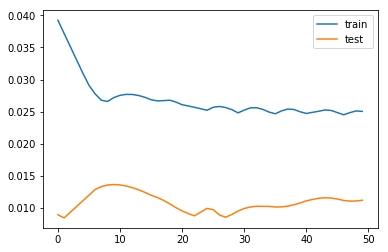

[[ 0.01467792]
 [-0.00775589]]


In [68]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM

#create network
model = Sequential()
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
#fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X,test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [80]:
yhat = model.predict(test_X)
print(np.ravel(yhat))
print(test_y)

[ 0.03795653  0.02930087  0.01817182  0.01467792 -0.00775589]
[ 0.03751699  0.02057845 -0.02823286  0.          0.        ]


In [ ]:
#plot each column
groups = [2,3,4,5]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(time_series.columns[group], y=0.5, loc='right')
	i += 1
plt.show()